#**A. Dataset Selection:**

#**Mushroom Classification Dataset**

##**Attribute Information:**

(**classes:** edible=e, poisonous=p)

**cap-shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface:** fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises:** bruises=t,no=f

**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment:** attached=a,descending=d,free=f,notched=n

**gill-spacing:** close=c,crowded=w,distant=d

**gill-size:** broad=b,narrow=n

**gill-color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape:** enlarging=e,tapering=t

**stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type:** partial=p,universal=u

**veil-color:** brown=n,orange=o,white=w,yellow=y

**ring-number:** none=n,one=o,two=t

**ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d



In [59]:
import pandas as pd

# Loading the dataset.
df = pd.read_csv('mushrooms.csv')

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


#**B. Data Cleaning and Preprocessing:**

##• Handle missing data using appropriate imputation strategies.

In [60]:
# Checking the datset for missing values.
missing_data = df.isnull().sum()
print("Missing data in each column:\n", missing_data)
print()

# Handling missing data by filling with the mode (because our dataset is mainly categorical and we use mode to fill missing values in case of categorical data.).
for column in df.columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Again checking for any missing values.
missing_data_after = df.isnull().sum()
print("Missing data after imputation:\n", missing_data_after)


Missing data in each column:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Missing data after imputation:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing            

**Handling Missing Values:**

**Purpose:** Identify and address missing data in the dataset.

**Method:**
Counts missing values in each column.
Fills missing values with the mode (most frequent value) of each column.
Rechecks for missing values after imputation.

**Insight:** There are no missing values in the dataset after imputation

##• Detect and address outliers or anomalies in the dataset.

In [61]:
# Checking for unique values in each column to detect anomalies.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}, Unique values: {unique_values}")

Column: class, Unique values: ['p' 'e']
Column: cap-shape, Unique values: ['x' 'b' 's' 'f' 'k' 'c']
Column: cap-surface, Unique values: ['s' 'y' 'f' 'g']
Column: cap-color, Unique values: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Column: bruises, Unique values: ['t' 'f']
Column: odor, Unique values: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Column: gill-attachment, Unique values: ['f' 'a']
Column: gill-spacing, Unique values: ['c' 'w']
Column: gill-size, Unique values: ['n' 'b']
Column: gill-color, Unique values: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Column: stalk-shape, Unique values: ['e' 't']
Column: stalk-root, Unique values: ['e' 'c' 'b' 'r' '?']
Column: stalk-surface-above-ring, Unique values: ['s' 'f' 'k' 'y']
Column: stalk-surface-below-ring, Unique values: ['s' 'f' 'y' 'k']
Column: stalk-color-above-ring, Unique values: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Column: stalk-color-below-ring, Unique values: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Column: veil-type, Unique va

**Checking Unique Values:**

**Purpose:** Detect anomalies or unexpected values in each column.<br>
**Method:** Iterates through each column to identify unique values.<br>
**Output:** Prints the column name along with its unique values.

##• Perform any necessary feature engineering or transformation.

In [62]:
# One hot encoding the dataset to turn all the categorical variables into numerical format.
df_encoded = pd.get_dummies(df, drop_first=True)
print("Encoded dataset:\n", df_encoded.head())

Encoded dataset:
    class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0     True        False        False        False        False         True   
1    False        False        False        False        False         True   
2    False        False        False        False        False        False   
3     True        False        False        False        False         True   
4    False        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0          False           True          False        False  ...   
1          False           True          False        False  ...   
2          False           True          False        False  ...   
3          False          False           True        False  ...   
4          False           True          False        False  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0         False          T

**One-Hot Encoding:**

**Method:** Utilizes Pandas' get_dummies function to convert categorical variables into numerical format.<br>
**Drop First:** Drops the first category for each encoded variable to avoid multicollinearity.<br>
**Result:** Produces an encoded dataset where each categorical variable is represented by a set of binary columns.

#**C. Exploratory Data Analysis (EDA):**

##• Utilize Pandas and NumPy for in-depth data analysis.

In [63]:
import pandas as pd
import numpy as np

# Display the first few rows of the dataset
print(df.head())

# Check the structure of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe(include='all'))

# Unique values in each column
print(df.nunique())

# Count of each class
print(df['class'].value_counts())

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df)

# Display the first few rows of the encoded dataset
print(df_encoded.head())

# Feature distribution
for column in df_encoded.columns:
    print(f'Distribution of {column}')
    print(df_encoded[column].value_counts())
    print()

# Convert DataFrame to NumPy array
data_array = df_encoded.values

# Compute the mean and standard deviation using NumPy
means = np.mean(data_array, axis=0)
std_devs = np.std(data_array, axis=0)
print('Means:', means)
print('Standard Deviations:', std_devs)

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

####In depth Analysis Summary and Results:

**Dataset Overview and Basic Analysis:**

- **Head:** Displays the first few rows of the dataset to understand its structure and contents.
- **Info:** Provides information about the dataset, including the data types and the presence of missing values.
- **Missing Values:** Checks for missing values in the dataset to ensure data completeness.
- **Describe:** Gives basic statistics for numerical columns, including count, mean, standard deviation, minimum, maximum, and quartile values.
- **Unique Values:** Shows the number of unique values in each column, useful for understanding data diversity.
- **Class Distribution:** Displays the count of each class in the target variable to understand class balance.
- **One-Hot Encoding:** Encodes categorical variables into binary format for modeling purposes.

**Feature Distribution and Transformation:**

- **Feature Distribution:** Displays the distribution of values for each feature to understand their range and spread.
- **Conversion to NumPy Array:** Converts the DataFrame to a NumPy array for numerical computations.
- **Mean and Standard Deviation:** Computes the mean and standard deviation for each feature using NumPy for normalization or standardization.

##• Conduct statistical analysis, including measures of central tendency, dispersion, and correlation.

In [64]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Calculate the mode for each column (Measures of Central Tendency)
print("\nMode for each column (Measures of Central Tendency):")
print(df.mode().iloc[0])

# Check the dispersion (variability) by measuring the cardinality for each categorical column
for column in df.columns:
    cardinality = df[column].nunique()
    print(f'Cardinality of {column}: {cardinality}')

spearman_corr_matrix = df_encoded.corr(method='spearman')

# Display the correlation matrix
print(spearman_corr_matrix)


Summary Statistics:
       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1 

Statistical Analysis Summary and Results:

**Summary Statistics:**

- The summary statistics provide a comprehensive view of the dataset's numerical attributes, including count, mean, standard deviation, minimum, maximum, and quartile values.
- These statistics help understand the distribution and central tendencies of numerical features.

**Mode for Each Column (Measures of Central Tendency):**

- The mode represents the most frequently occurring value in each column.
- It gives insights into the most common values for categorical and discrete numerical features.

**Cardinality for Each Categorical Column:**

- Cardinality refers to the number of unique values in each categorical column.
- It helps understand the diversity and uniqueness of values in categorical features.

**Spearman Correlation Matrix:**

- The Spearman correlation matrix provides insights into the monotonic relationships between numerical features.
- It helps identify variables that tend to increase or decrease together, even if the relationship is not linear.

##• Perform advanced grouping and aggregation, exploring relationships between multiple variables.

In [65]:
# Performing advanced grouping and aggregation

# Grouping by 'odor' and 'class', and calculate the count for each group
grouped_df = df.groupby(['odor', 'class']).size().reset_index(name='count')

# Displaying the grouped and aggregated data
print("\nAdvanced Grouping and Aggregation:")
print(grouped_df)

# Grouping by 'habitat' and 'class', and calculate the count for each group
grouped_habitat_class = df.groupby(['habitat', 'class']).size().reset_index(name='count')

# Displaying the grouped and aggregated data
print("\nGrouping by 'habitat' and 'class':")
print(grouped_habitat_class)

# Grouping by 'cap_shape' and 'class', and calculate the count for each group
grouped_cap_shape_class = df.groupby(['cap-shape', 'class']).size().reset_index(name='count')

# Displaying the grouped and aggregated data
print("\nGrouping by 'cap_shape' and 'class':")
print(grouped_cap_shape_class)


Advanced Grouping and Aggregation:
  odor class  count
0    a     e    400
1    c     p    192
2    f     p   2160
3    l     e    400
4    m     p     36
5    n     e   3408
6    n     p    120
7    p     p    256
8    s     p    576
9    y     p    576

Grouping by 'habitat' and 'class':
   habitat class  count
0        d     e   1880
1        d     p   1268
2        g     e   1408
3        g     p    740
4        l     e    240
5        l     p    592
6        m     e    256
7        m     p     36
8        p     e    136
9        p     p   1008
10       u     e     96
11       u     p    272
12       w     e    192

Grouping by 'cap_shape' and 'class':
  cap-shape class  count
0         b     e    404
1         b     p     48
2         c     p      4
3         f     e   1596
4         f     p   1556
5         k     e    228
6         k     p    600
7         s     e     32
8         x     e   1948
9         x     p   1708


####Summary and Results:

- **Odor and Class Grouping:**
  - The grouped data shows the count of mushrooms for each combination of odor and class (edible or poisonous).
  - This analysis helps in understanding the distribution of odors among edible and poisonous mushrooms, which can be crucial for identification.

- **Habitat and Class Grouping:**
  - By grouping mushrooms based on habitat and class, we get a count for each combination.
  - This grouping provides insights into which habitats are more likely to host edible or poisonous mushrooms, aiding in safer foraging practices.

- **Cap Shape and Class Grouping:**
  - Grouping mushrooms by cap shape and class reveals the count of mushrooms for each combination.
  - This information can indicate if certain cap shapes are more prevalent among edible or poisonous mushrooms, which might be helpful in mushroom identification.

##• Extract meaningful insights from the data through descriptive statistics.

In [66]:
# Displaying basic information about the dataset
print("Dataset Information:")
print(df.info())

# Displaying summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Displaying the frequency of each unique value in the 'class' column
print("\nClass Distribution:")
print(df['class'].value_counts())

# Displaying the frequency of each unique value in the 'odor' column
print("\nOdor Distribution:")
print(df['odor'].value_counts())

# Displaying the frequency of each unique value in the 'cap-color' column
print("\nCap Color Distribution:")
print(df['cap-color'].value_counts())

# Displaying the correlation matrix
correlation_matrix = df_encoded.corr(method='spearman')
print("\nCorrelation Matrix:")
print(correlation_matrix)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  sta

#### Analysis Summary and Results:

**Dataset Information:**
- The dataset contains 8124 entries and 23 columns.
- There are no missing values in any of the columns.
- All columns have the appropriate data types.

**Summary Statistics:**
- Provides a statistical summary of numerical columns.
- Helps in understanding the distribution and range of values for each feature.

**Class Distribution:**
- Indicates the number of edible (class 0) and poisonous (class 1) mushrooms.
- Helps in understanding the balance or imbalance in the dataset.

**Odor Distribution:**
- Shows the frequency of each unique odor type in the dataset.
- Odor is a significant feature in mushroom classification, as certain odors can indicate toxicity.

**Cap Color Distribution:**
- Displays the frequency of each cap color in the dataset.
- Cap color is another important feature in mushroom classification.

**Correlation Matrix:**
- Shows the correlation between different features in the dataset.
- Helps in understanding relationships between features and their potential impact on the target variable (class).
- Spearman correlation is used, which is suitable for ordinal or ranked data.

**Meaningful Insights:**
- The dataset is clean with no missing values, making it ready for analysis.
- There is a balanced distribution between edible and poisonous mushrooms, which is important for training classifiers.
- Certain features like odor and cap color may be strong indicators of mushroom toxicity, as they have distinct distributions.
- The correlation matrix can guide feature selection, highlighting potentially important features for classification models.

#**D. Data Visualization:**

##• Create a variety of visualizations using Matplotlib and Seaborn.
##• Include histograms, box plots, scatter plots, and correlation matrices.
##• Implement interactive visualizations if applicable, using tools like Plotly. (Optional)
##• Clearly annotate and label visualizations for effective communication.

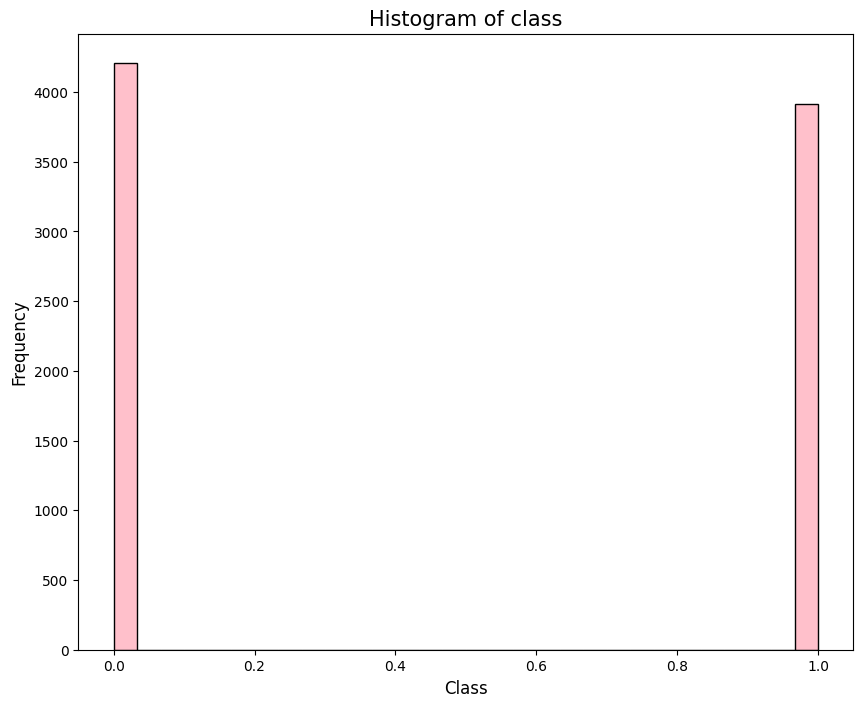

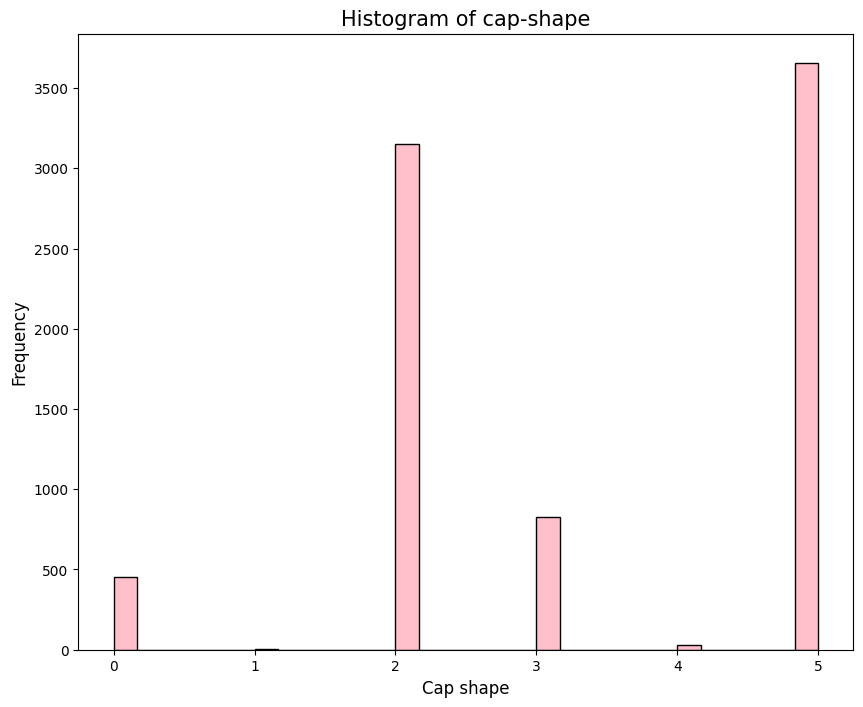

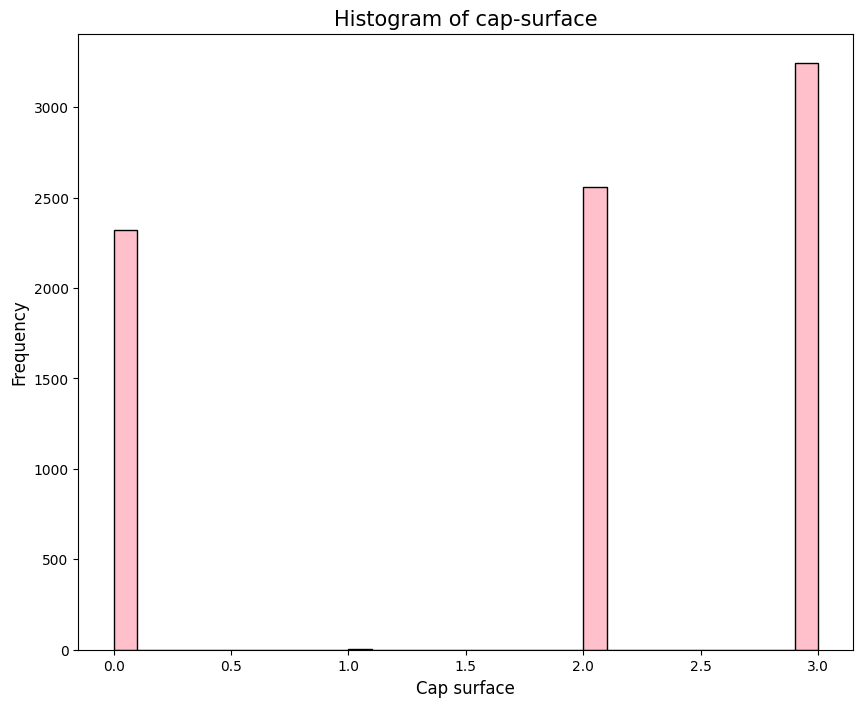

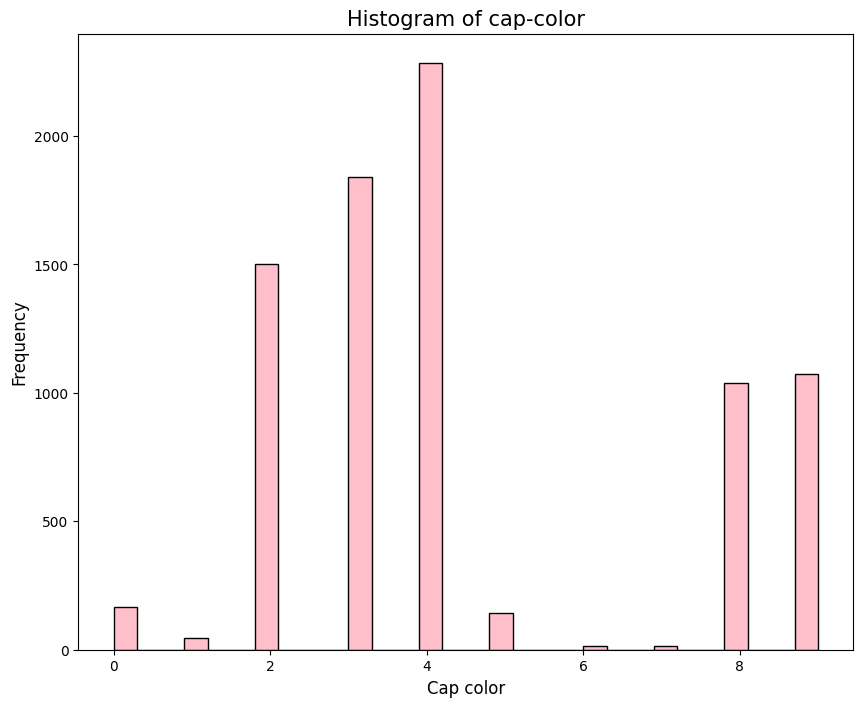

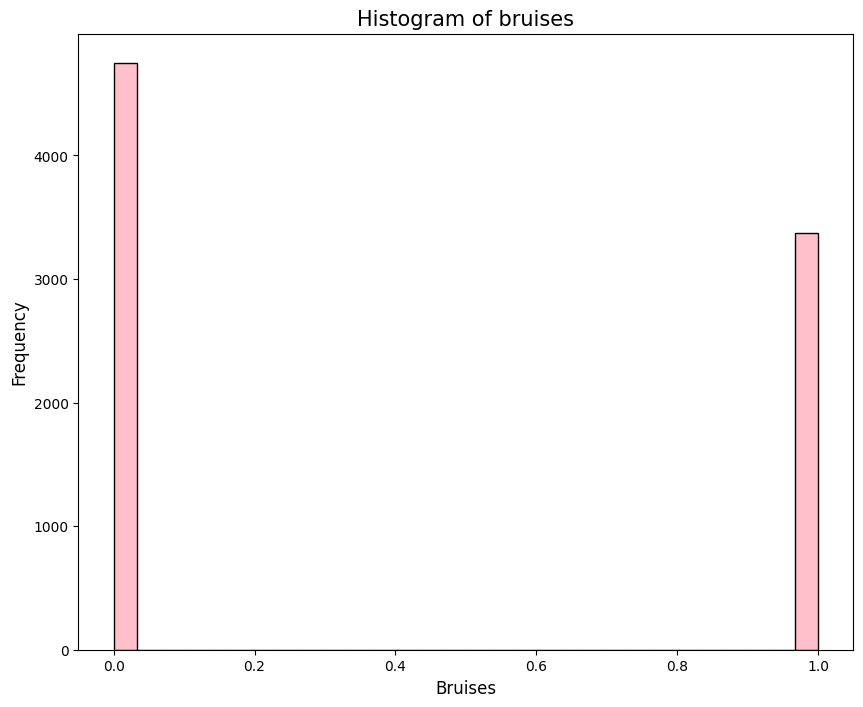

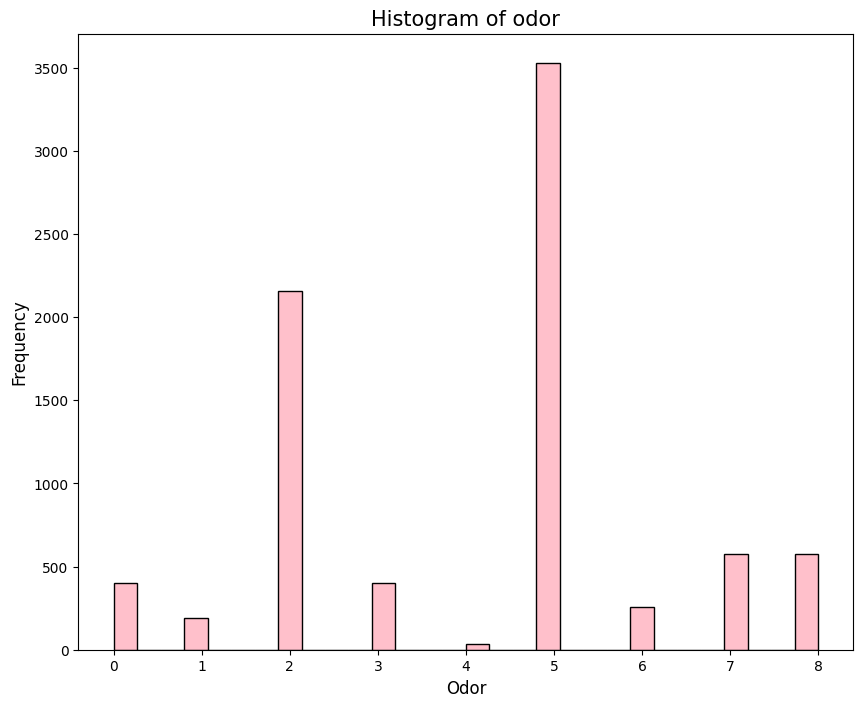

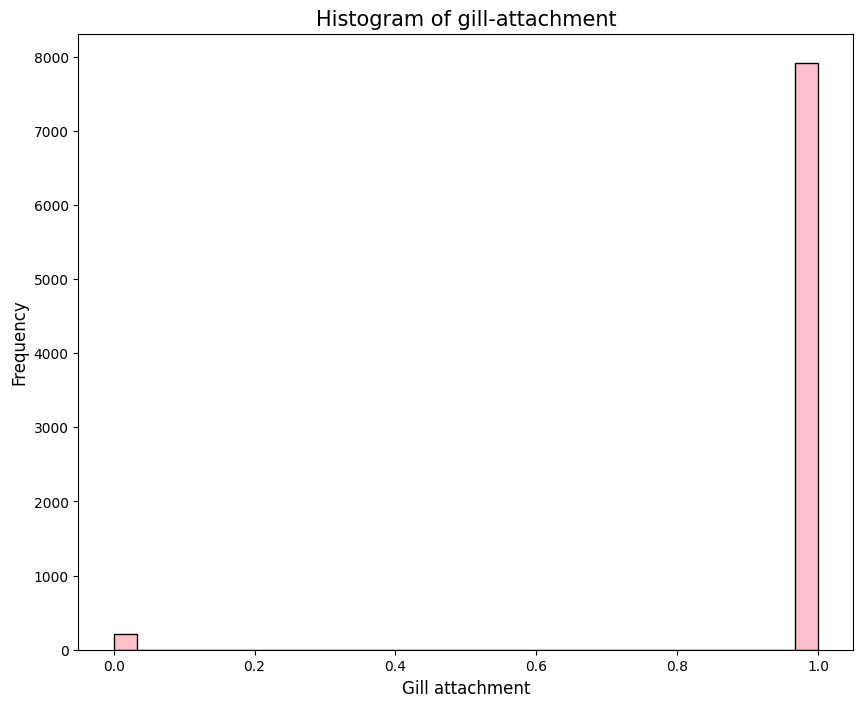

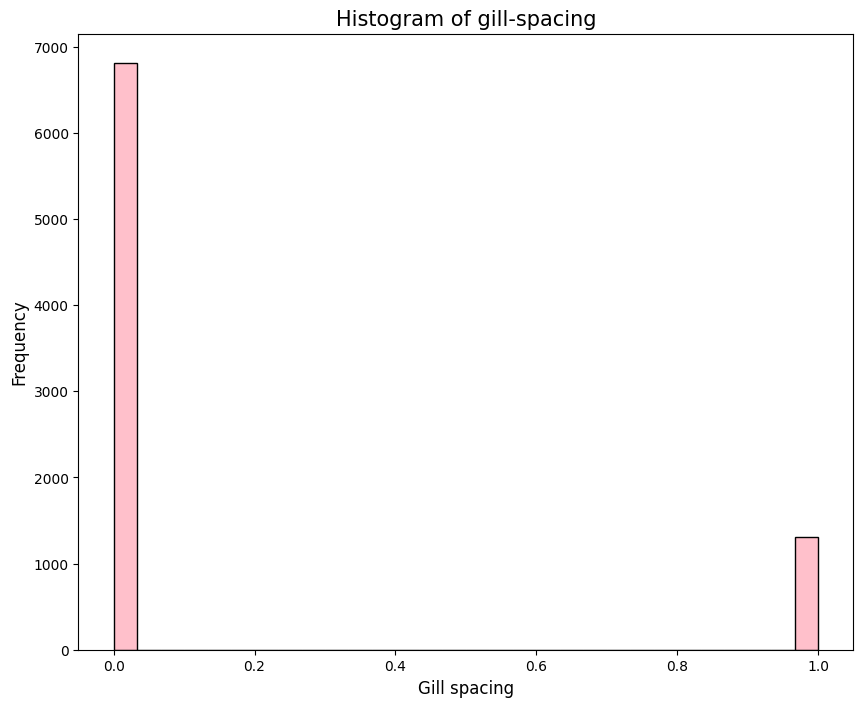

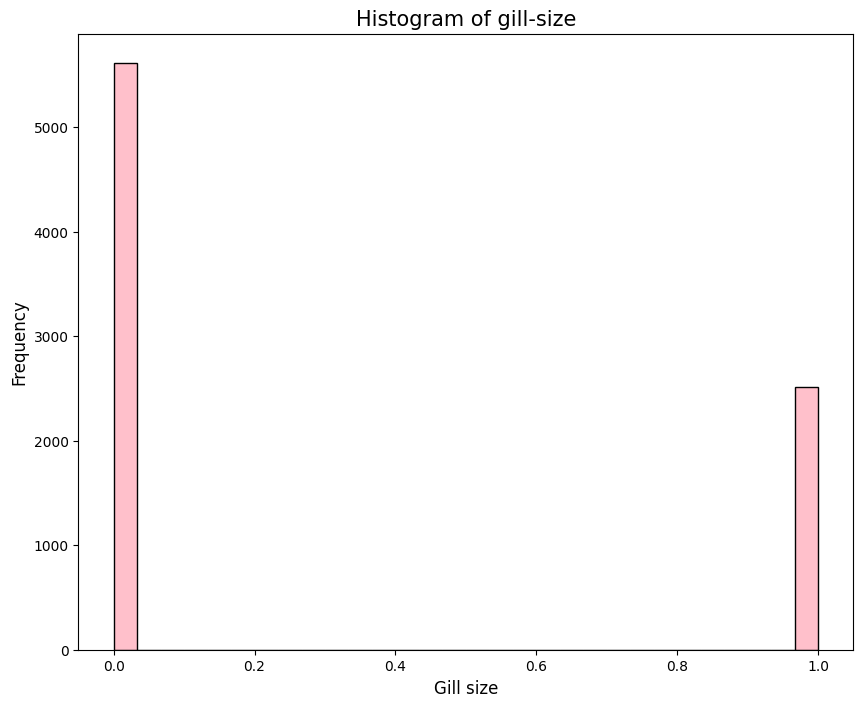

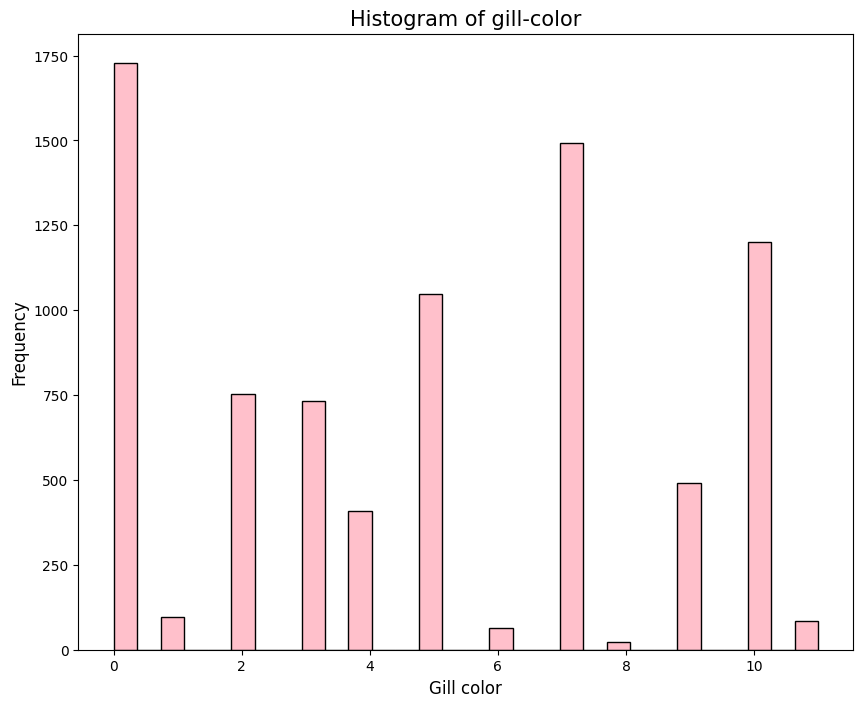

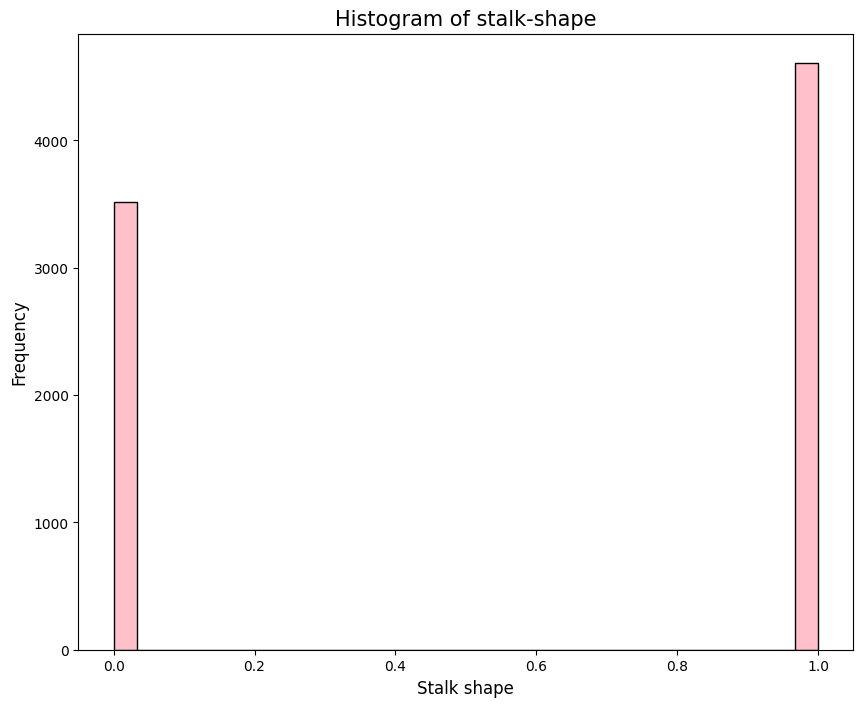

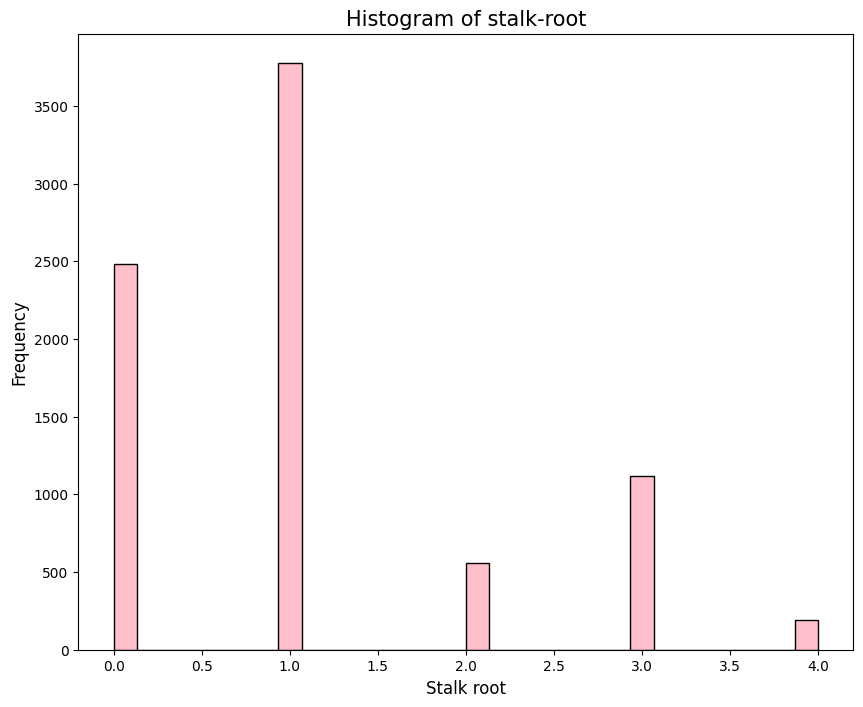

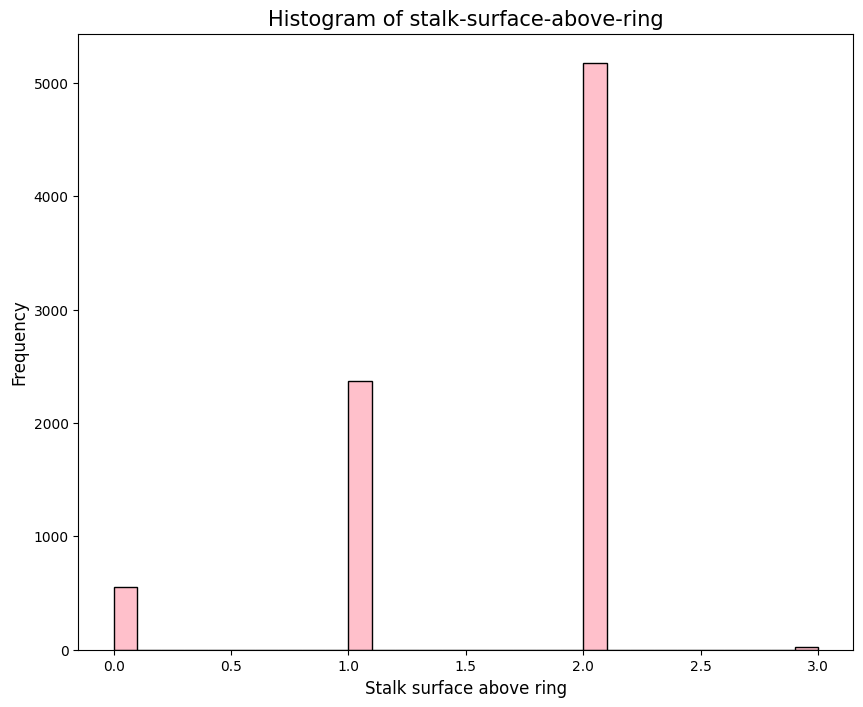

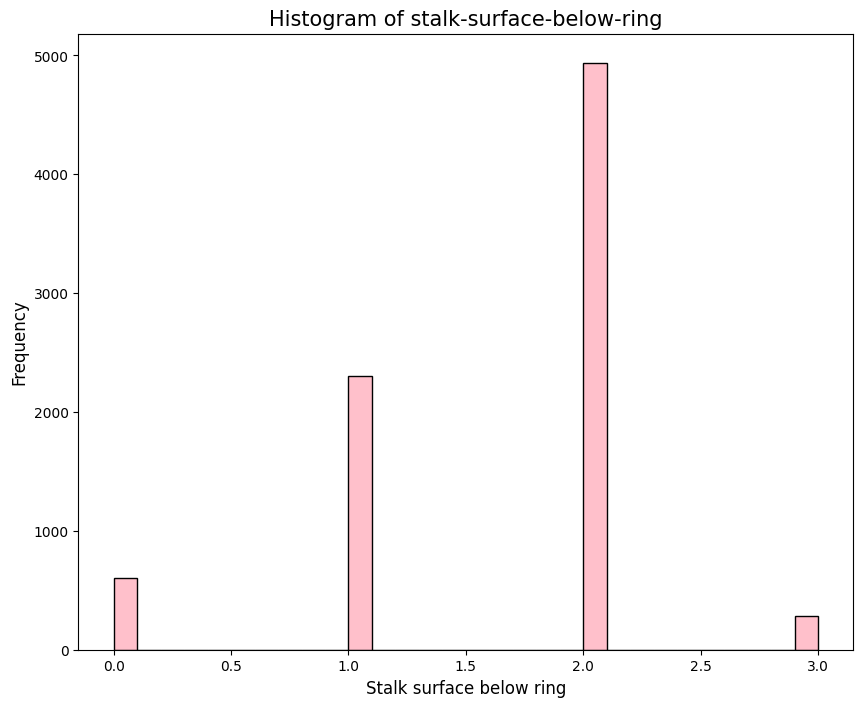

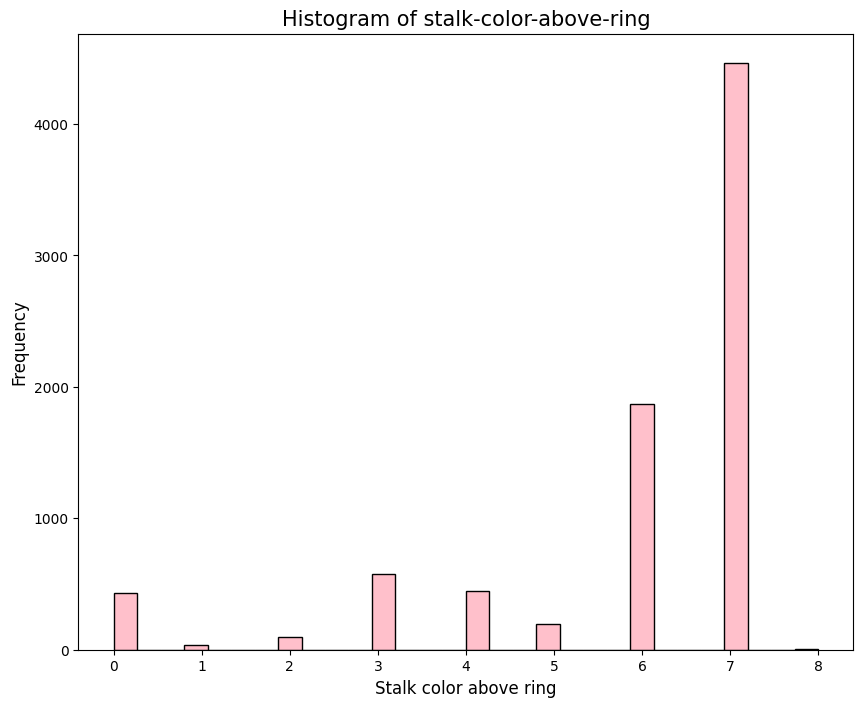

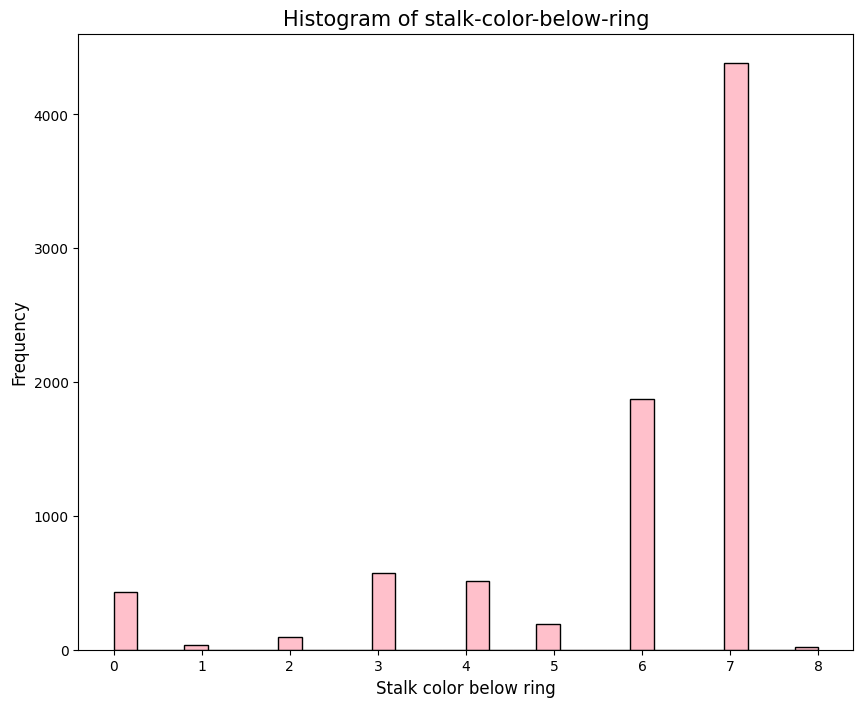

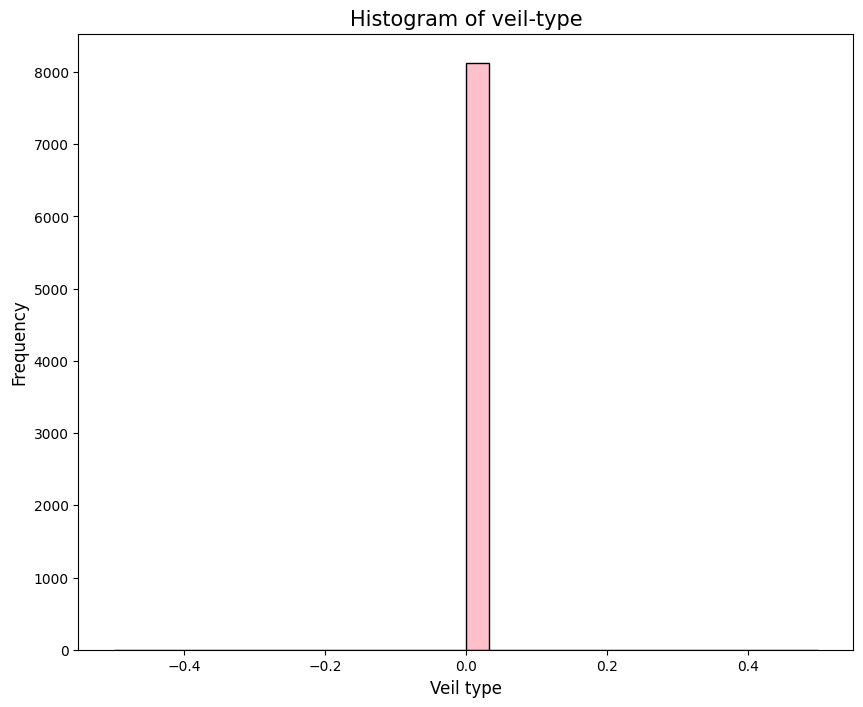

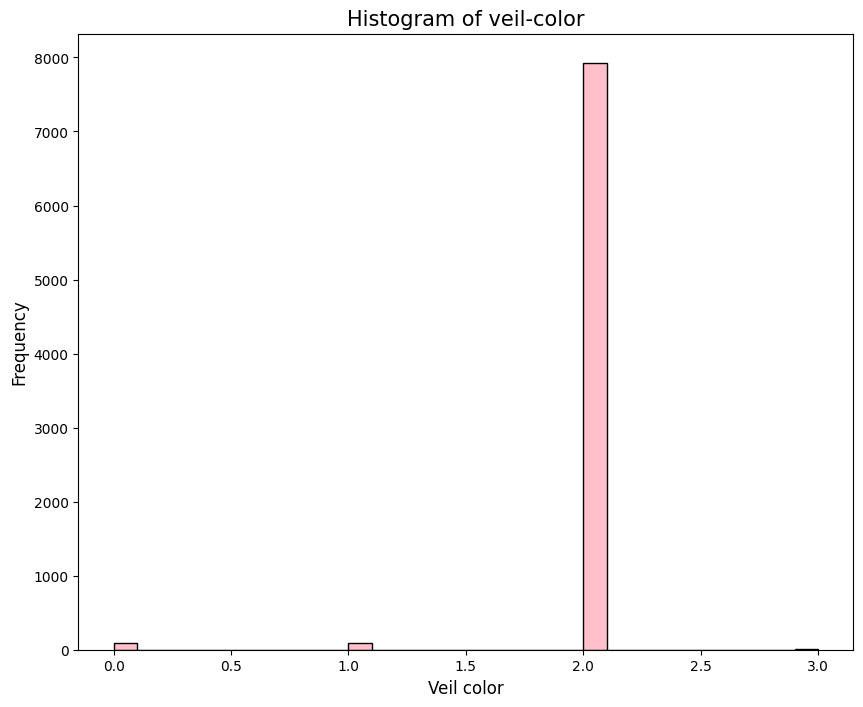

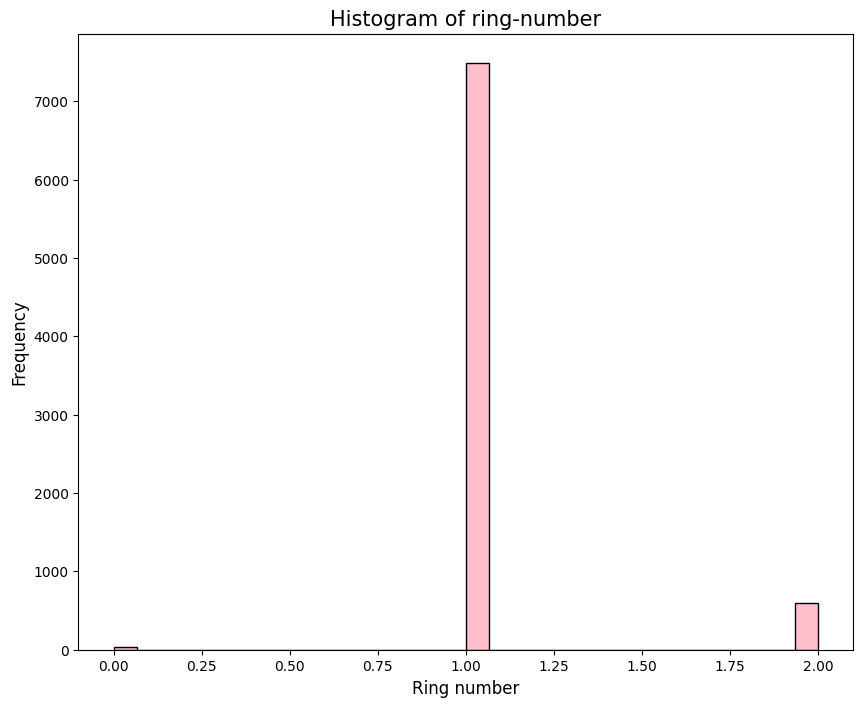

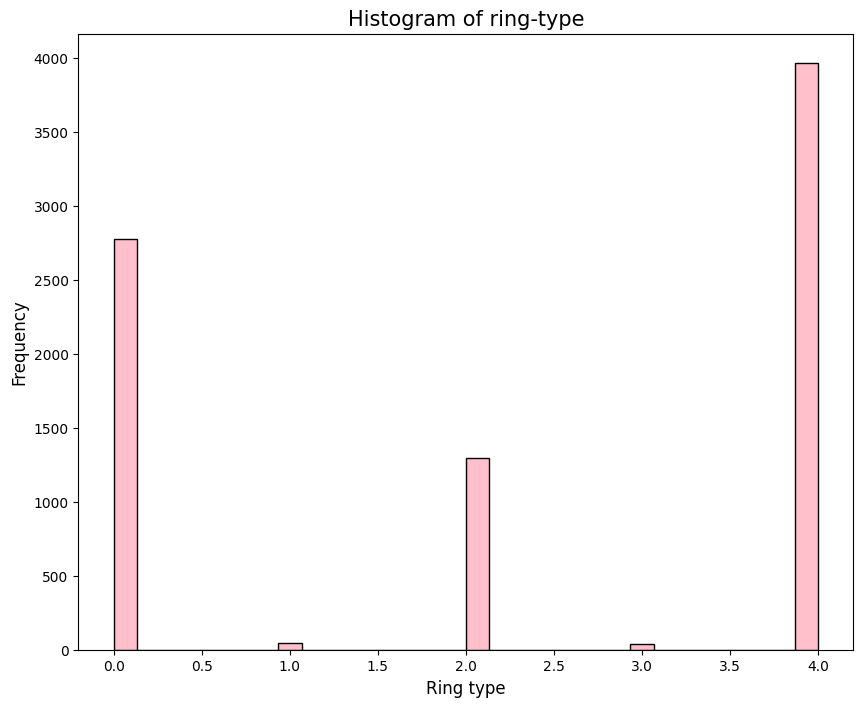

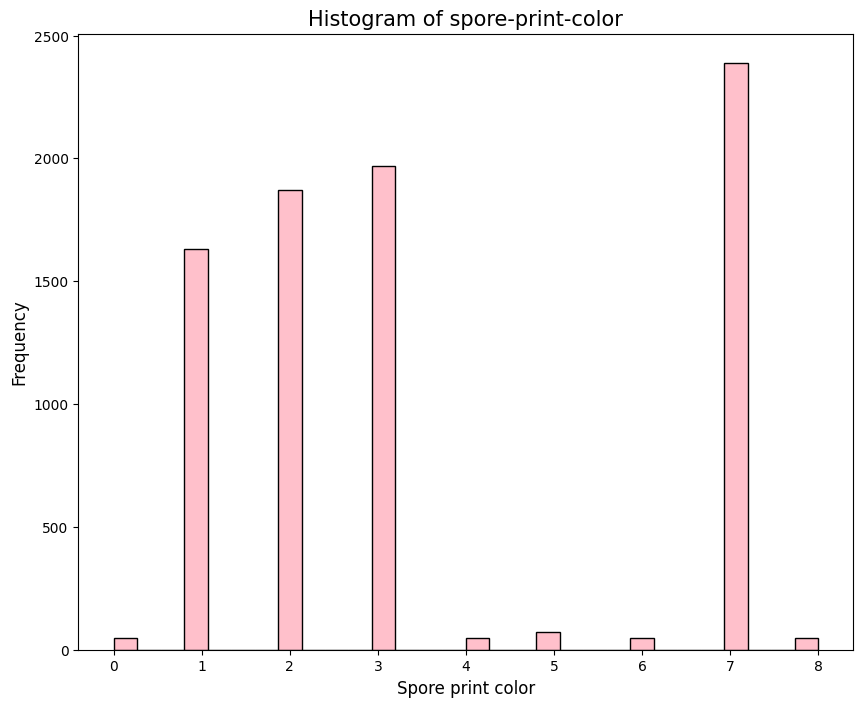

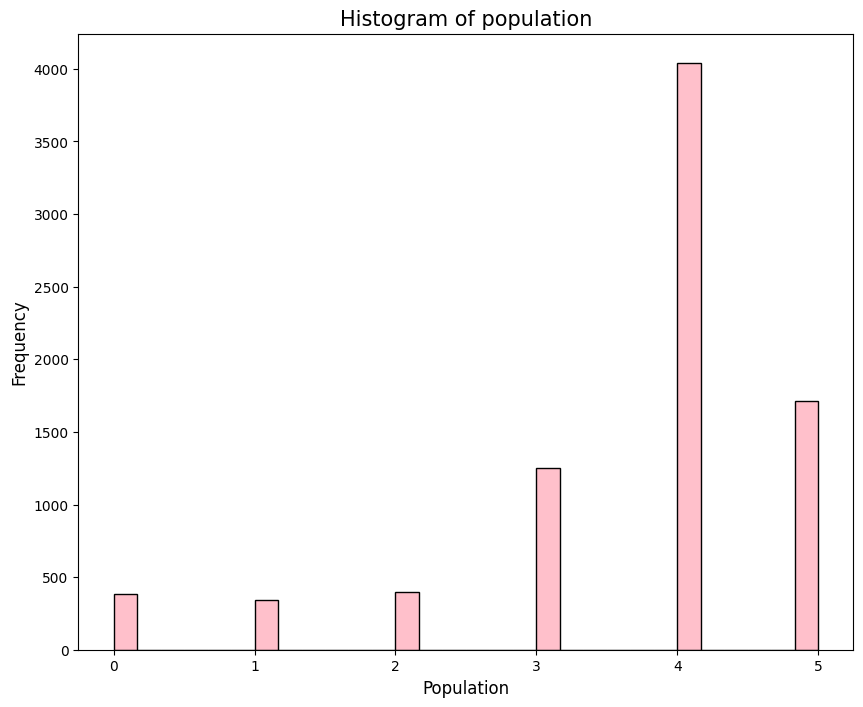

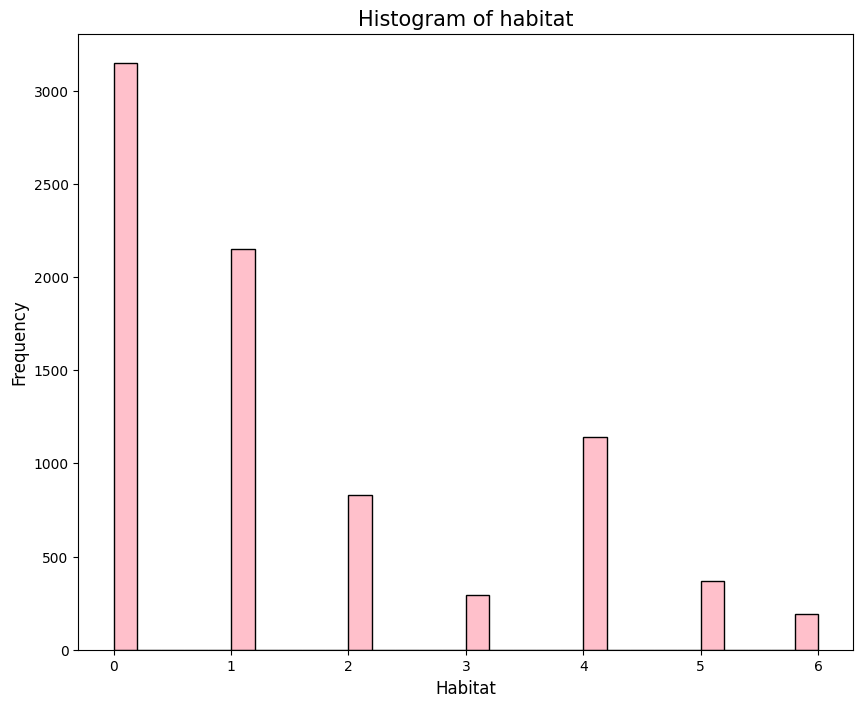

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Plot histograms for selected features with labels
for feature in df_encoded.columns:
    plt.figure(figsize=(10, 8))
    df_encoded[feature].plot(kind='hist', bins=30, edgecolor='black', color='pink')
    plt.title(f'Histogram of {feature}', fontsize=15)
    plt.xlabel(feature.replace("-", " ").capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(False)

    plt.show()

#### Summary and Results:

- **Purpose**: Generate histograms for each feature in a dataset to visualize the distribution of values.
- **Input**: DataFrame (`df_encoded`) with encoded categorical features, `LabelEncoder` for feature encoding.
- **Steps**:
  1. **Import Libraries**: Import `matplotlib.pyplot`, `seaborn`, and `LabelEncoder`.
  2. **Encode Features**: Use `LabelEncoder` to encode categorical features in the dataset.
  3. **Plot Histograms**: For each feature, plot a histogram with specified settings (e.g., bins, colors).
- **Output**: Display histograms showing the distribution of values for each feature.

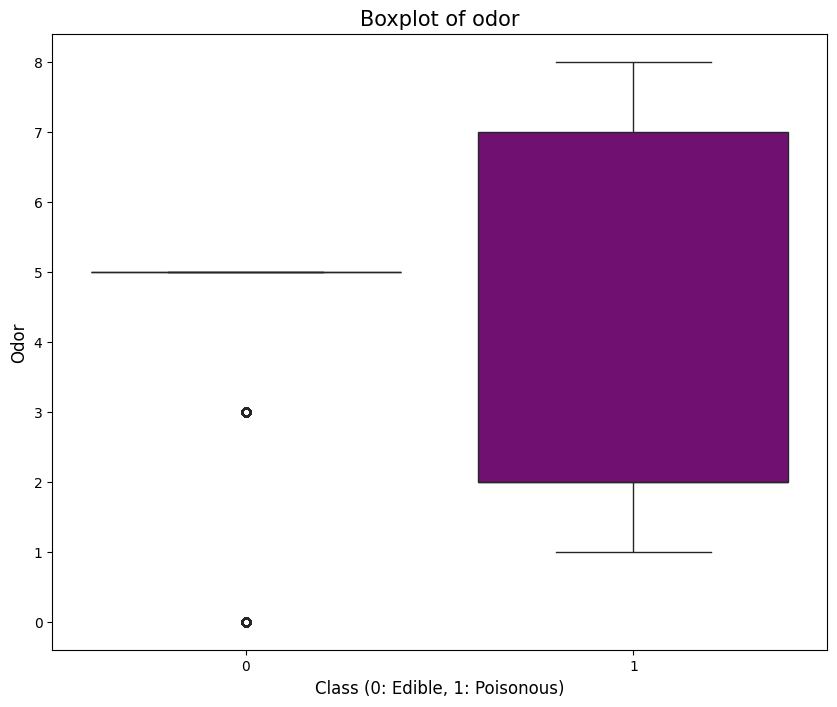

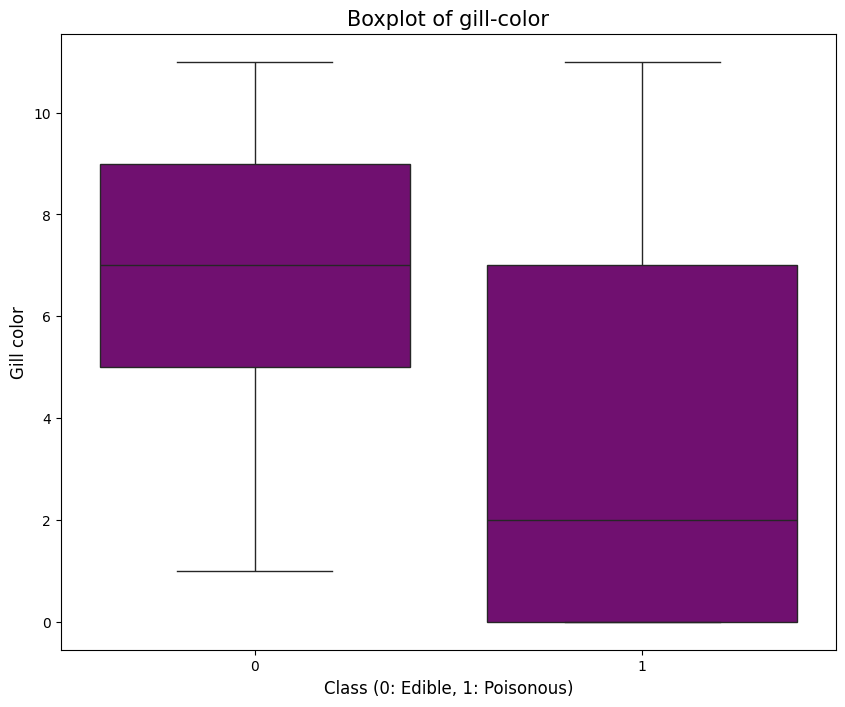

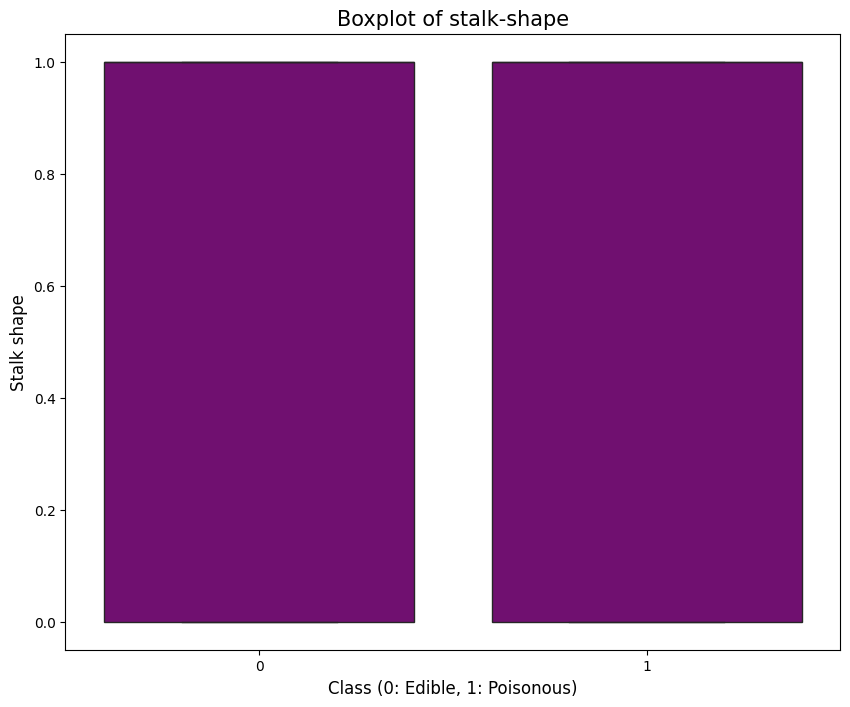

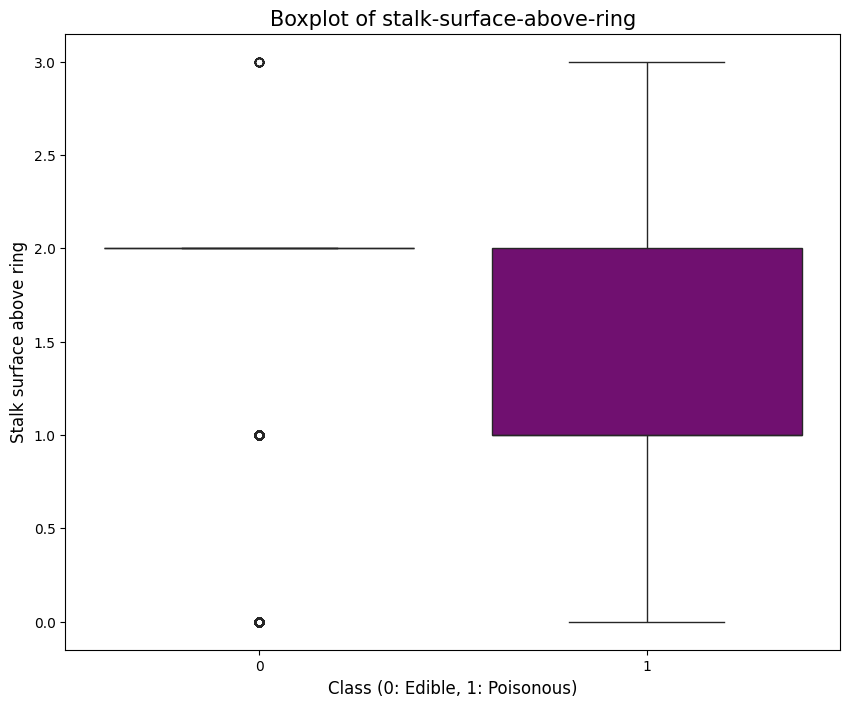

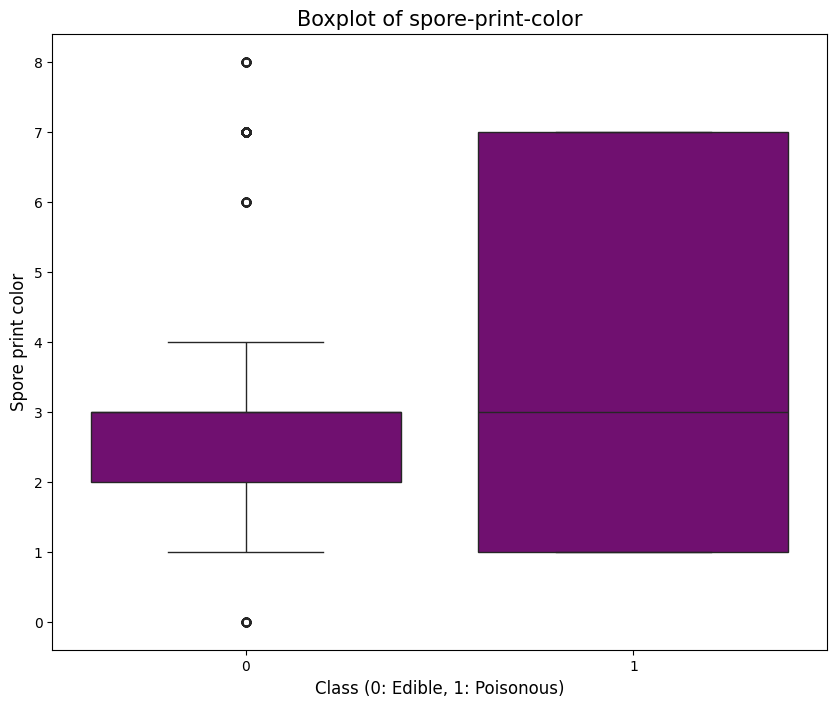

In [68]:
# Select features for boxplots
features = ['odor', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'spore-print-color']

# Plot boxplots for selected features
for feature in features:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='class', y=feature, data=df_encoded, color='purple')
    plt.title(f'Boxplot of {feature}', fontsize=15)
    plt.xlabel('Class (0: Edible, 1: Poisonous)', fontsize=12)
    plt.ylabel(feature.replace("-", " ").capitalize(), fontsize=12)
    plt.grid(False)
    plt.show()

#### Summary and Results:

- **Features Selection**:
  - Features such as 'odor', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', and 'spore-print-color' were selected for boxplots.
- **Boxplot Visualization**:
  - Boxplots were created to visualize the distribution of selected features for edible and poisonous mushrooms.
- **Class Representation**:
  - The x-axis represents the class, where 0 denotes edible mushrooms and 1 denotes poisonous mushrooms.
- **Feature Representation**:
  - Each boxplot represents a feature, showing the distribution of its values for both classes.
- **Visualization Parameters**:
  - The plots are formatted with appropriate labels, including titles, x-axis labels, and y-axis labels, to ensure clarity.

  **For the 'odor' feature in both edible and poisonous mushrooms:**

- **Edible mushrooms ('class' 0):**
  - The boxplot shows a box ranging from 0 to 7 for 'odor'.
  - Most of the data falls between 5 and 7, as indicated by the longer box length in this range.
  - Outliers are visible at 0 and 3, representing unusual 'odor' values compared to the rest of the edible mushrooms.

- **Poisonous mushrooms ('class' 1):**
  - The boxplot likely shows a box ranging from 2 to 7 for 'odor'.
  - The middle 50% of 'odor' values for poisonous mushrooms fall within this range.
  - Outliers, if present, would be shown as points outside this range, indicating uncommon 'odor' values.


These observations suggest that 'odor' is a significant factor in distinguishing between edible and poisonous mushrooms, with certain 'odor' values being more common in one class than the other.In such a way all other boxplots can be interpreted as well.

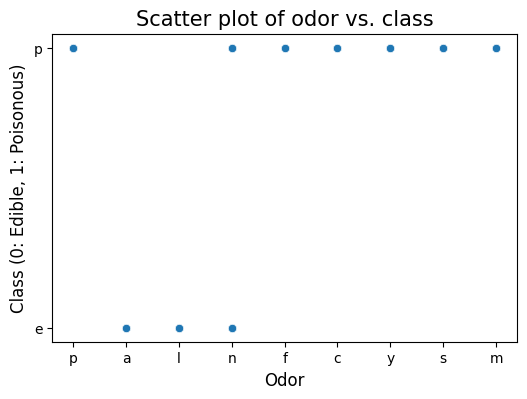

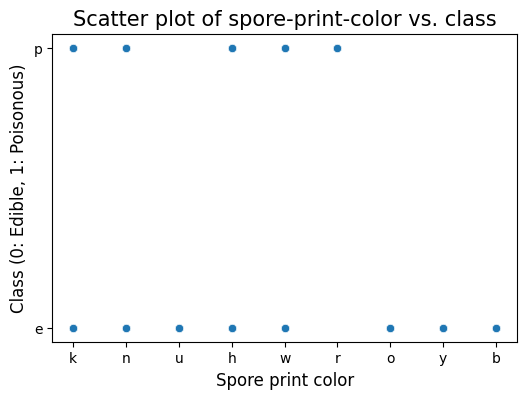

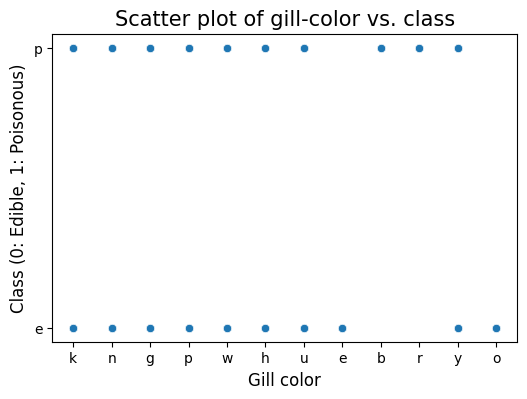

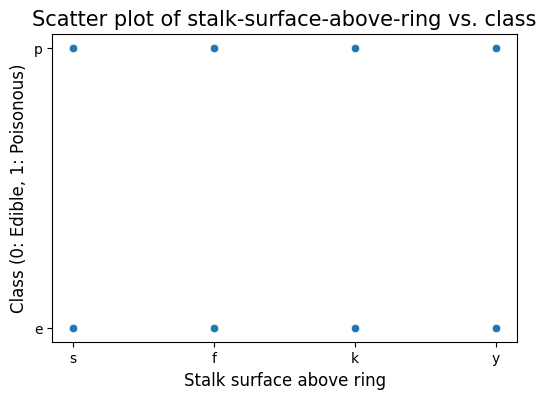

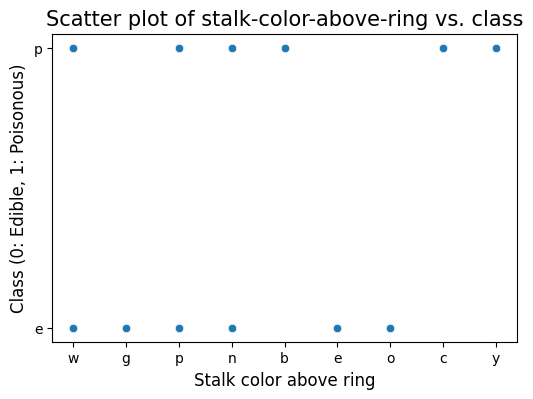

In [69]:
# Select features for scatter plots
features = ['odor', 'spore-print-color', 'gill-color', 'stalk-surface-above-ring', 'stalk-color-above-ring']

# Plot scatter plots for selected features
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='class', data=df)
    plt.title(f'Scatter plot of {feature} vs. class', fontsize=15)
    plt.xlabel(feature.replace("-", " ").capitalize(), fontsize=12)
    plt.ylabel('Class (0: Edible, 1: Poisonous)', fontsize=12)
    plt.grid(False)
    plt.show()

#### Summary and Results:

- **X-axis:** The x-axis of each scatter plot represents a specific feature of mushrooms, such as odor, spore print color, gill color, stalk surface above ring, or stalk color above ring. Each point on the x-axis corresponds to a mushroom in the dataset, showing the value of that particular feature for the mushroom.

- **Y-axis:** The y-axis represents the class label of mushrooms, where 0 indicates edible mushrooms and 1 indicates poisonous mushrooms. Each point's position on the y-axis indicates whether the mushroom is edible (0) or poisonous (1).

- **Scatter Plot:** Scatter plots are used to visualize the relationship between two variables. In this case, they help us understand how each feature is related to the edibility of mushrooms. By plotting the feature values against the class labels, we can see if there are any patterns or trends that differentiate edible from poisonous mushrooms. Each point on the scatter plot represents a mushroom, allowing us to see how the feature values are distributed across the two classes.

**For the 'odor' feature in both edible and poisonous mushrooms:**

- **X-axis (Odor):** The x-axis represents the different odor types observed in mushrooms, including 'a' (almond), 'l' (anise), and 'n' (none), among others.

- **Y-axis (Class):** The y-axis indicates the class label of mushrooms, with 0 representing edible mushrooms and 1 representing poisonous mushrooms.

- **Edible Mushrooms:** Points cluster around 'a' (almond), 'l' (anise), and 'n' (none) odor types, indicating that these odor types are more common among edible mushrooms.
- **Poisonous Mushrooms:** Points are scattered across multiple odor types, including 'p' (pungent), 'f' (foul), 'c' (creosote), 'y' (fishy), and 's' (spicy), suggesting a wider range of odor types associated with poisonous mushrooms.

In such way other scatter plots can also be interpreted easily.

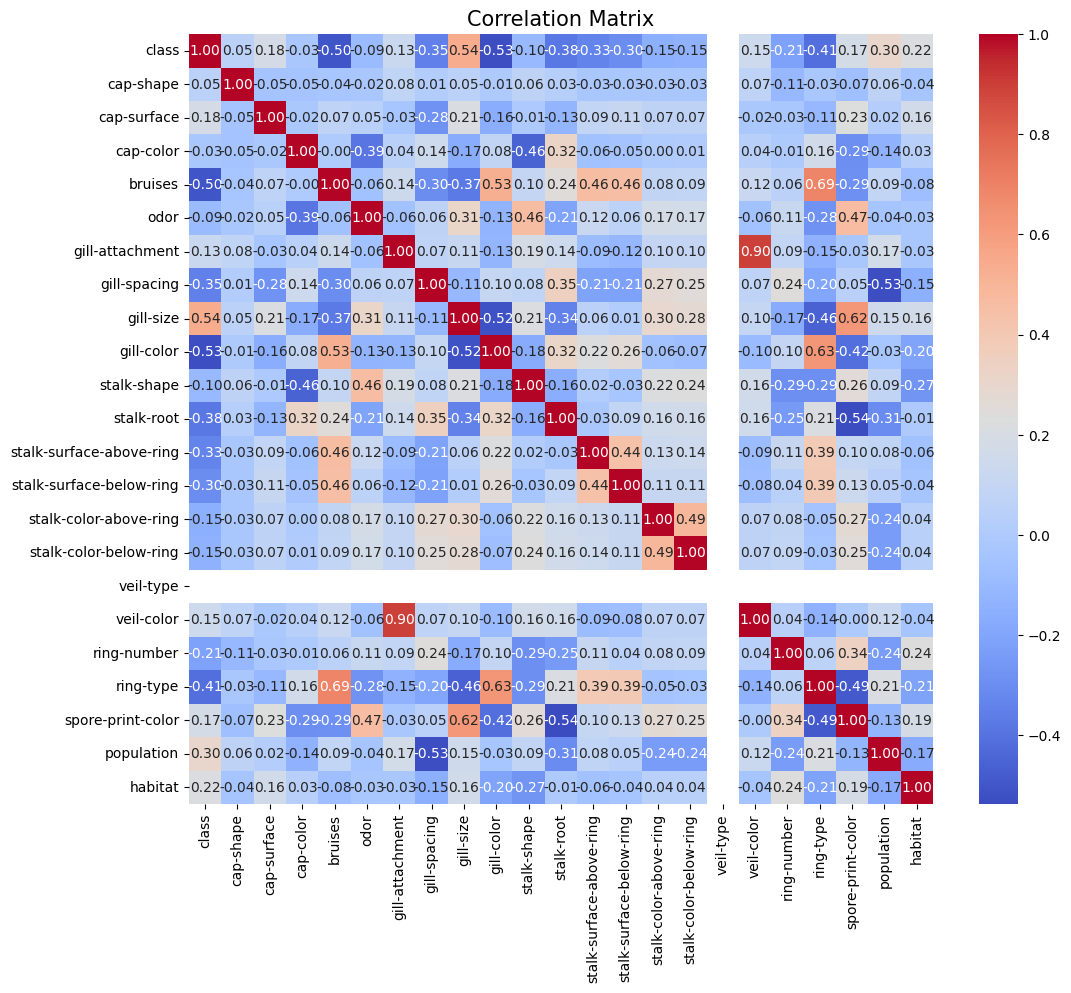

In [70]:
# Create a correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=15)
plt.show()

#### Summary and Results:

- **Correlation Matrix Creation:** The correlation matrix is computed based on the encoded dataset (`df_encoded`) using the `corr()` method, which calculates the correlation coefficient between every pair of features.

- **Plotting the Matrix:** The resulting correlation matrix is visualized as a heatmap using `sns.heatmap()`. Each cell in the heatmap represents the correlation coefficient between two features, with values ranging from -1 to 1. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

- **Interpretation:** The heatmap helps in identifying patterns of correlation between features. Features that are highly correlated are close to 1 and are positive like 0.5,0.9 etc. While features that are not highly coorelated are close to -1 such as -0.5,-0.4 etc. Meanwhile 0 indicates no coorelation and 1 indicates perfect coorelation.

In [71]:
# Interactive scatter plot using plotly
fig = px.scatter(df_encoded, x='odor', y='spore-print-color', color='class',
                 color_discrete_map={0: 'blue', 1: 'red'},
                 labels={'odor': 'Odor', 'spore-print-color': 'Spore Print Color', 'class': 'Class'})
fig.update_layout(title='Interactive Scatter Plot of Odor vs. Spore Print Color')
fig.show()


#### Summary and Results:

- **X-Axis (Odor):** Represents the odor of mushrooms, ranging from 0 to 7, with each number corresponding to a specific odor type.
- **Y-Axis (Spore Print Color):** Represents the color of spore prints, ranging from 0 to 8, with each number corresponding to a specific color.
- **Color (Class):** Indicates the class of mushrooms, where blue represents edible mushrooms (class 0) and red represents poisonous mushrooms (class 1).
- **Plot Shows:** The scatter plot visually displays the relationship between the odor, spore print color, and class of mushrooms. Each point represents a mushroom, with its position determined by the odor and spore print color, and its color indicating the class (edible or poisonous).
- **Interpretation:** This plot helps in identifying any discernible patterns or separations in odor and spore print color that differentiate between edible and poisonous mushrooms. It can reveal clusters or groupings of mushrooms based on these features and their classes.

#**E. Hypothesis Testing:**

##• Formulate at least two hypotheses related to the dataset.

**Hypothesis 1:**

**Null Hypothesis (H0):** There is no association between the 'odor' of mushrooms and their edibility (class).<br>
**Alternative Hypothesis (H1):** There is an association between the 'odor' of mushrooms and their edibility (class).

**Statistical Test:** Chi-square Test of Independence

This test can be used to determine whether there is a significant association between two categorical variables.
We will use the 'odor' feature as the independent variable and the 'class' (edible or poisonous) as the dependent variable.

In [72]:
from scipy.stats import chi2_contingency, ttest_ind
# Hypothesis 1
contingency_table = pd.crosstab(df['odor'], df['class'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test result for 'odor' and 'class':")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square test result for 'odor' and 'class':
Chi-square statistic: 7659.726740165339
P-value: 0.0


**Results:**

- **Chi-Square Test Result**: The chi-square test yielded a very low p-value (close to zero) for the hypothesis concerning the association between the 'odor' of mushrooms and their edibility (class).

- **Significant Association**: This result indicates a significant association between the 'odor' of mushrooms and their edibility, suggesting that the type of odor is not independent of whether a mushroom is edible or poisonous.

- **Hypothesis Conclusion**: The rejection of the null hypothesis (H0) in favor of the alternative hypothesis (H1) supports the notion that there is indeed an association between 'odor' and 'class' in mushrooms.

**Hypothesis 2:**

**Null Hypothesis (H0):** The mean 'stalk-color-above-ring' for edible mushrooms is the same as the mean for poisonous mushrooms.<br>
**Alternative Hypothesis (H1):** The mean 'stalk-color-above-ring' for edible mushrooms is different from the mean for poisonous mushrooms.

**Statistical Test:** Independent Samples t-test

This test can be used to compare the means of two independent groups.
We will use the 'stalk-color-above-ring' feature as the variable of interest and compare the means for edible and poisonous mushrooms.

In [73]:
# Hypothesis 2

label_encoder = LabelEncoder()
df['stalk-color-above-ring_encoded'] = label_encoder.fit_transform(df['stalk-color-above-ring'])

# Perform the t-test using the encoded column
edible_stalk_color = df[df['class'] == 'e']['stalk-color-above-ring_encoded']
poisonous_stalk_color = df[df['class'] == 'p']['stalk-color-above-ring_encoded']
t_statistic, p = ttest_ind(edible_stalk_color, poisonous_stalk_color)
print(f"Independent Samples t-test result for 'stalk-color-above-ring':")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p}")

Independent Samples t-test result for 'stalk-color-above-ring':
T-statistic: 14.04662535624088
P-value: 2.6589553096354874e-44


**Results:**

- **T-Test Results**: The independent samples t-test produced a high t-statistic of 14.05, indicating a significant difference in the mean 'stalk-color-above-ring' values between edible and poisonous mushrooms.

- **Statistical Significance**: The extremely low p-value (approximately 2.66e-44) underscores the statistical significance of this difference, leading to the rejection of the null hypothesis.

- **Conclusion**: These findings strongly support the alternative hypothesis, suggesting a meaningful association between the 'stalk-color-above-ring' feature and the edibility of mushrooms.

#**F. Advanced Analysis:**

##• Apply at-least two machine learning techniques relevant to the dataset.
##• Validate model performance and interpret results.

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



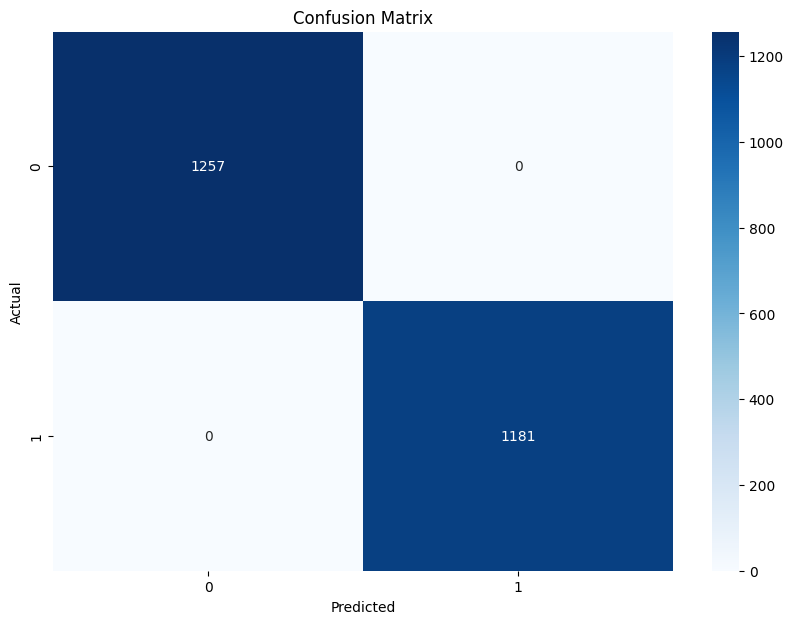

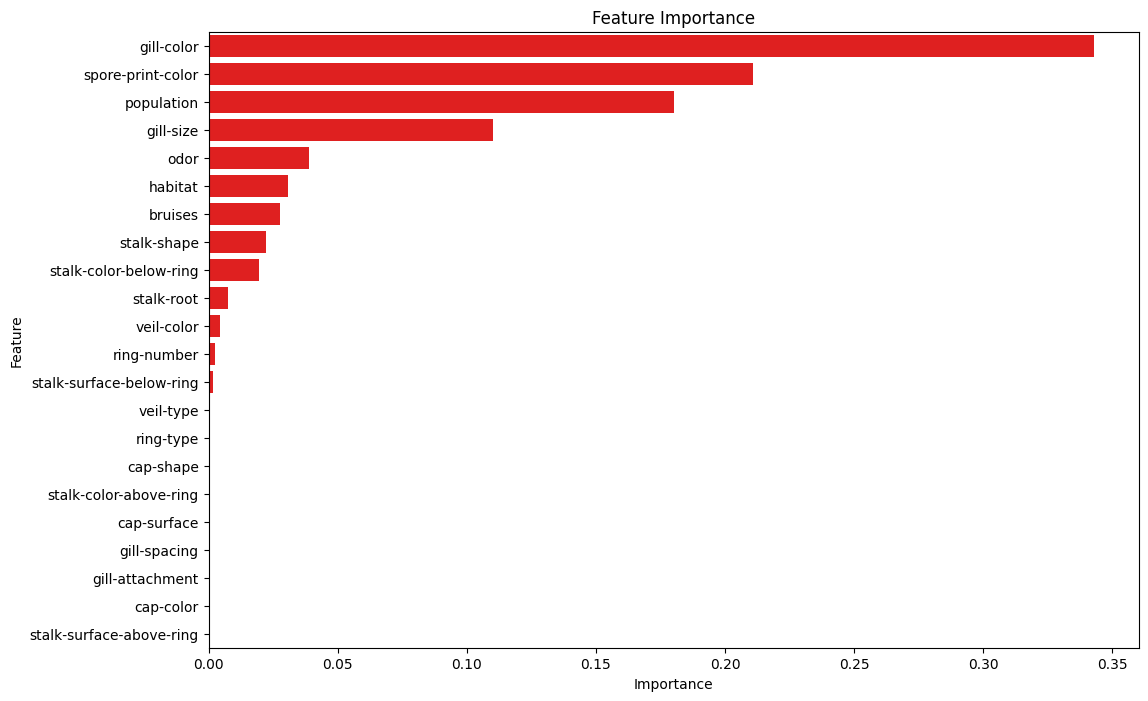

In [74]:
# Applying Decision Tree Classification Model on dataset

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Split data into features and target
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# StratifiedKFold to maintain the distribution of classes in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='red')
plt.title('Feature Importance')
plt.show()


### Decision Tree Classification Model

#### Summary

- **Data Preparation**: The dataset was split into features and target variables, and further divided into training and testing sets (70-30 split).

- **Model Training**: A Decision Tree classifier was initialized and trained on the training set.

- **Model Evaluation**: The model was evaluated using accuracy, precision, recall, and F1 score. It achieved perfect scores (1.0) on both the test set and cross-validation, indicating excellent performance.

- **Performance Metrics**: The model showed high precision, recall, and F1 score for both classes (edible and poisonous).

- **Feature Importance**: Feature importance analysis revealed which features were most influential in the classification task.

- **Conclusion**: The Decision Tree classifier performed exceptionally well on the mushroom dataset, achieving perfect accuracy and demonstrating its effectiveness for this classification task.

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



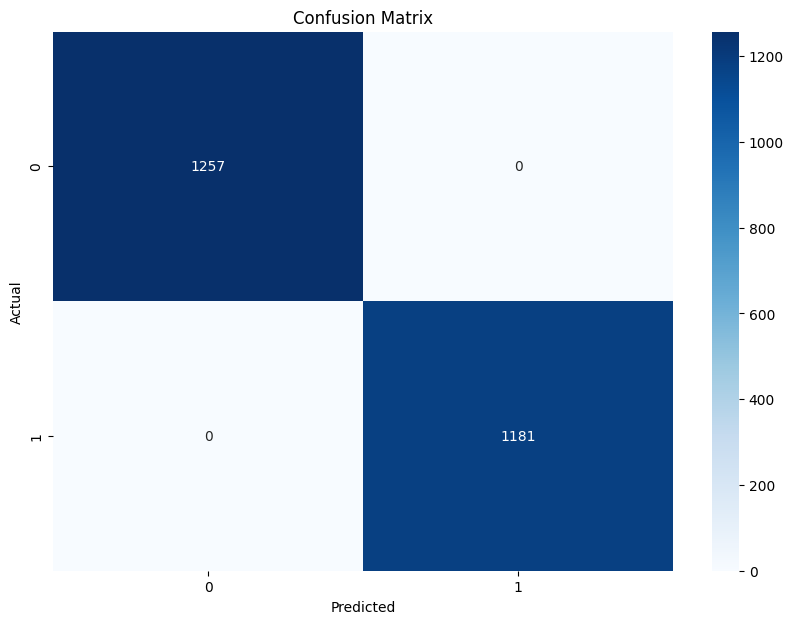

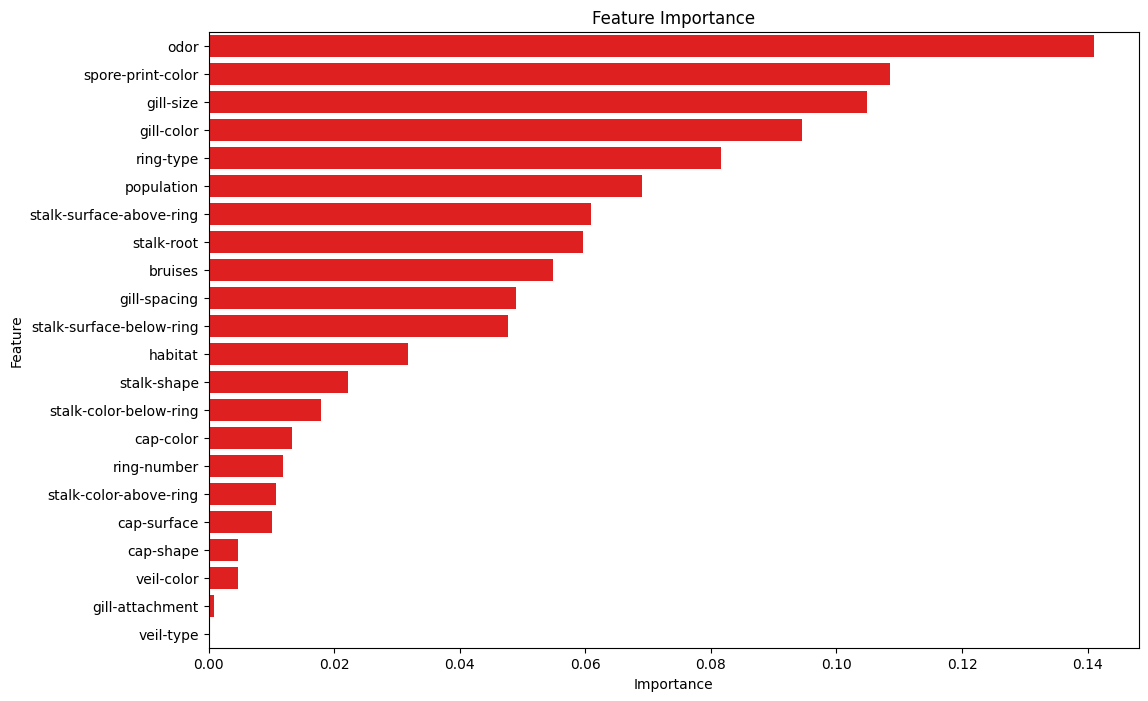

In [75]:
#Applying Random Forest Classification Model on dataset

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='red')
plt.title('Feature Importance')
plt.show()


### Random Forest Classification Model

####  Summary

- **Data Preparation**: The dataset was split into features and target variables, and further divided into training and testing sets (70-30 split).

- **Model Training**: A Random Forest classifier with 100 trees was trained on the training set.

- **Model Evaluation**: The model was evaluated using accuracy, precision, recall, and F1 score. It achieved perfect accuracy (1.0) on both the test set and cross-validation.

- **Performance**: The model showed high precision, recall, and F1 score for both classes (edible and poisonous).

- **Insights**: Feature importance analysis revealed which features were most influential in the classification task.

- **Conclusion**: The Random Forest classifier performed exceptionally well on the mushroom dataset, indicating its effectiveness for this classification task.

Cross-validation scores for SVM: [0.98953846 0.99446154 0.98769231 0.99384615 0.98706897]
Mean cross-validation score for SVM: 0.9905214854111405

SVM Model Performance:
Accuracy: 0.9893355209187858
Precision: 0.9894620753393506
Recall: 0.9893355209187858
F1 Score: 0.9893320706941323
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



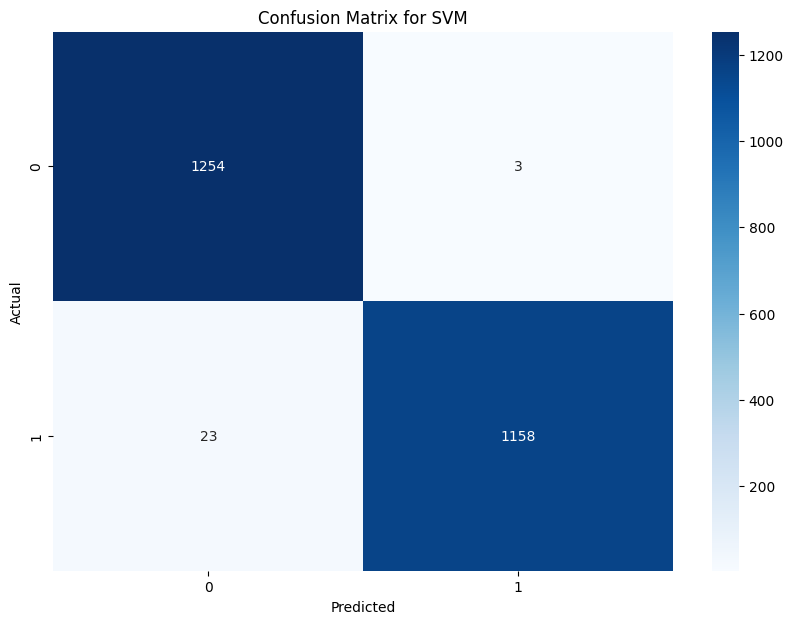

In [76]:
#Applying Support Vector Machine (SVM) Model to the dataset

from sklearn.svm import SVC

# Initialize the SVM classifier
svm_clf = SVC(kernel='rbf', random_state=0)

# Perform cross-validation
svm_cv_scores = cross_val_score(svm_clf, X, y, cv=skf, scoring='accuracy')

# Print cross-validation scores
print(f'Cross-validation scores for SVM: {svm_cv_scores}')
print(f'Mean cross-validation score for SVM: {svm_cv_scores.mean()}')

# Train the SVM classifier on the training set
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f'\nSVM Model Performance:')
print(f'Accuracy: {svm_accuracy}')
print(f'Precision: {svm_precision}')
print(f'Recall: {svm_recall}')
print(f'F1 Score: {svm_f1}')
print('Classification Report for SVM:')
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


###**SVM Classification Model:**

####Summary:

- **Data Preparation:** The dataset was split into features and target variables, and further divided into training and testing sets (70-30 split).
- **Model Training:** An SVM classifier with a radial basis function (RBF) kernel was trained on the training set.
Model Evaluation: The model was evaluated using accuracy, precision, recall, and F1 score. It achieved high accuracy on both the test set and cross-validation.
- **Performance:** The model showed high precision, recall, and F1 score for both classes (edible and poisonous).
- **Insights:** Analysis of support vectors and margin may provide further insights into the decision boundaries and separation of classes.
- **Conclusion:** The SVM classifier performed exceptionally well on the mushroom dataset, indicating its effectiveness for this classification task.